In [3]:
## Program: A Coding Template for building ML Models for Prediction
# using various algorithms
# Includes comprehensive data cleaning and data exploration steps
## Author: Prof. Arin Brahma

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Titanic data from Github
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/titanic/titanic-data.csv")
#df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")

In [5]:
## Print first few rows
print(df.head())

   survived  pclass     sex   age  sibsp  parch            ticket     fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  cabin embarked  
0   NaN        S  
1   C85        C  
2   NaN        S  
3  C123        S  
4   NaN        S  


In [6]:
## print the DataFrame's shape
print(df.shape)

(891, 10)


In [7]:
## print the DataFrame's data types
pd.set_option('display.max_rows', None)
#pd.reset_option('max_rows')
print(df.dtypes)

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object


In [8]:
## check for missing values
print(df.isnull().sum())

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64


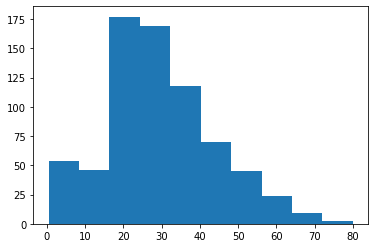

In [9]:
## visualize the distribution of a numeric column
plt.hist(df['age'])
plt.show()

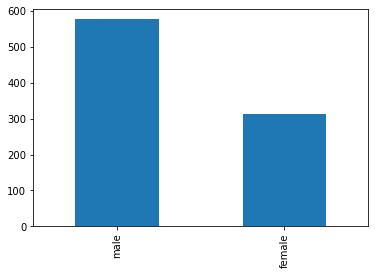

In [10]:
## visualize the distribution of a categorical column
df['sex'].value_counts().plot(kind='bar')
plt.show()

In [11]:
## calculate basic statistics for a numeric column
print(df['fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


In [12]:
## calculate the correlation between two numeric columns
print(df['fare'].corr(df['survived']))

0.2573065223849625


In [13]:
## Method 1: group the data by a categorical column and calculate statistics
grouped_df = df.groupby('pclass')['age'].mean()
print(grouped_df)

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64


In [14]:
## Method 2: group the data by a categorical column and calculate statistics
grouped_df = df.groupby('pclass')
grouped_df = grouped_df['age'].mean()
print(grouped_df)

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64


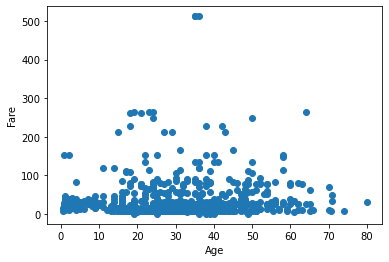

In [15]:
## create a scatter plot to visualize the relationship between two numeric columns
plt.scatter(df['age'], df['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

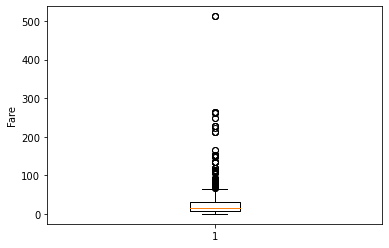

In [16]:
## create a box plot to visualize the distribution of a numeric column
plt.boxplot(df['fare'])
plt.ylabel('Fare')
plt.show()

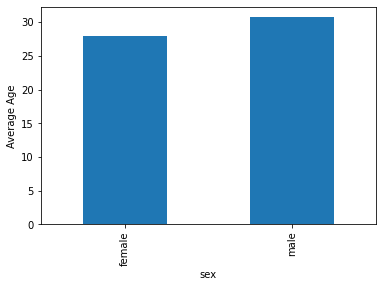

In [17]:
## create a bar plot to visualize the mean of a numeric column for each category of a categorical column
df_grouped = df.groupby('sex')
df_grouped = df_grouped['age'].mean()
df_grouped.plot(kind='bar')
plt.ylabel('Average Age')
plt.show()

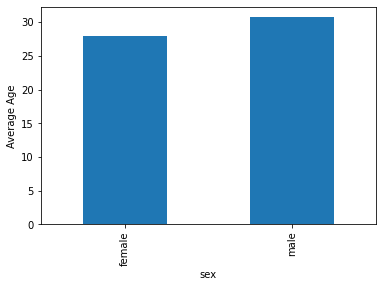

In [18]:
df.groupby('sex')['age'].mean().plot(kind='bar')
plt.ylabel('Average Age')
plt.show()

In [19]:
## create a pivot table to summarize the data
## Question: For each Passenger Class, what is the fare average by Sex
pivot_table = df.pivot_table(index='sex', columns='pclass', values='fare', aggfunc='mean')
print(pivot_table)

pclass           1          2          3
sex                                     
female  106.125798  21.970121  16.118810
male     67.226127  19.741782  12.661633


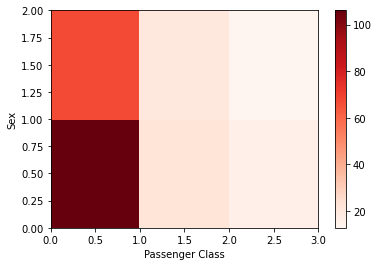

In [20]:
## create a heatmap to visualize the pivot table
plt.pcolor(pivot_table, cmap='Reds')
plt.colorbar()
plt.xlabel('Passenger Class')
plt.ylabel('Sex')
plt.show()

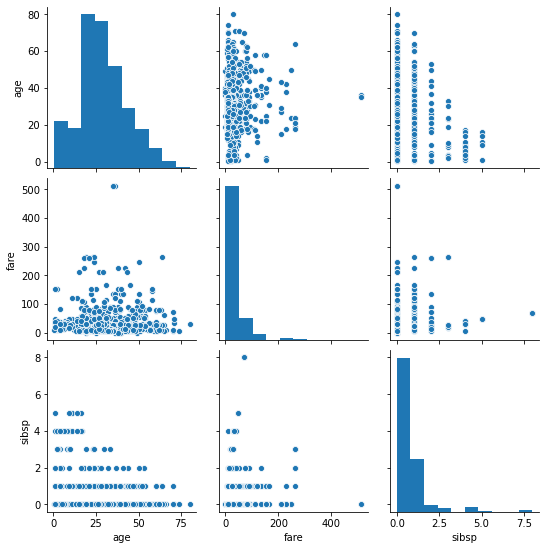

In [21]:
## create a pairplot to visualize the relationships between multiple numeric columns
sns.pairplot(df, vars=['age', 'fare', 'sibsp'])
plt.show()

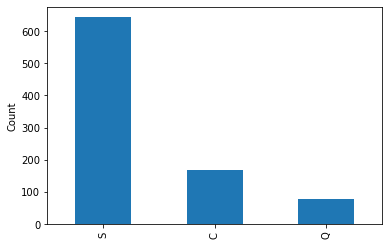

In [22]:
## create a bar plot to visualize the count of a categorical column
df['embarked'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

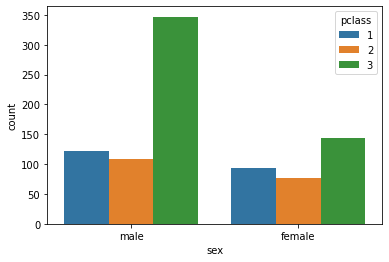

In [23]:
## create a countplot to visualize the count of a categorical column by the categories of another categorical column
sns.countplot(x='sex', hue='pclass', data=df)
plt.show()

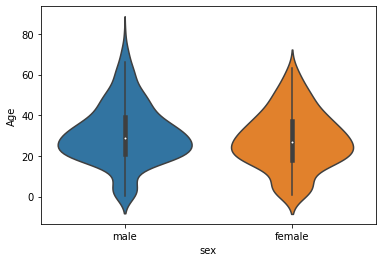

In [24]:
## create a violin plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.violinplot(x='sex', y='age', data=df)
plt.ylabel('Age')
plt.show()

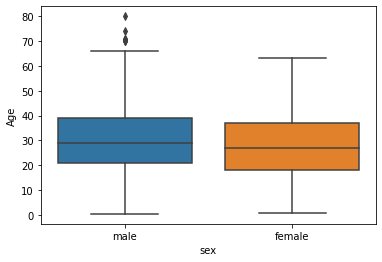

In [25]:
## create a box plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.boxplot(x='sex', y='age', data=df)
plt.ylabel('Age')
plt.show()

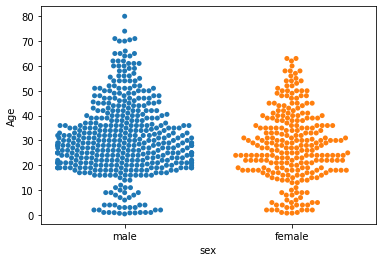

In [26]:
## create a swarm plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.swarmplot(x='sex', y='age', data=df)
plt.ylabel('Age')
plt.show()

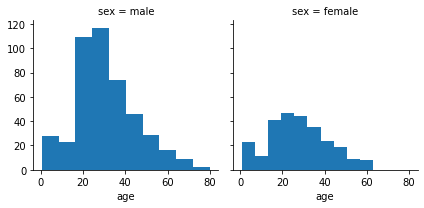

In [27]:
## create a faceting grid to visualize the distribution of multiple numeric columns by the categories of a categorical column
g = sns.FacetGrid(df, col='sex')
g.map(plt.hist, 'age')
plt.show()

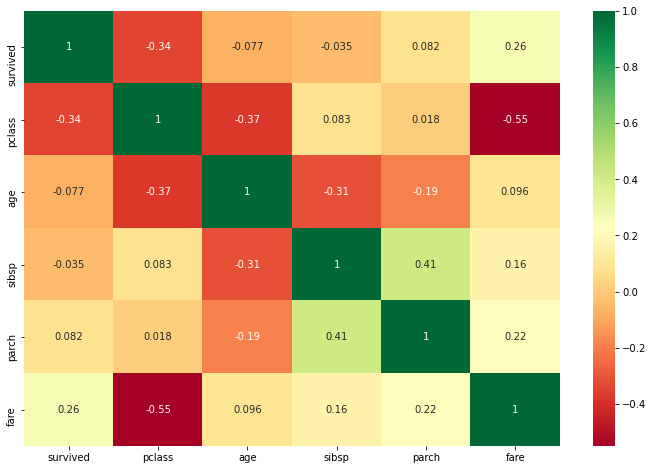

In [28]:
## create a heatmap to visualize the correlation between multiple columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
plt.show()

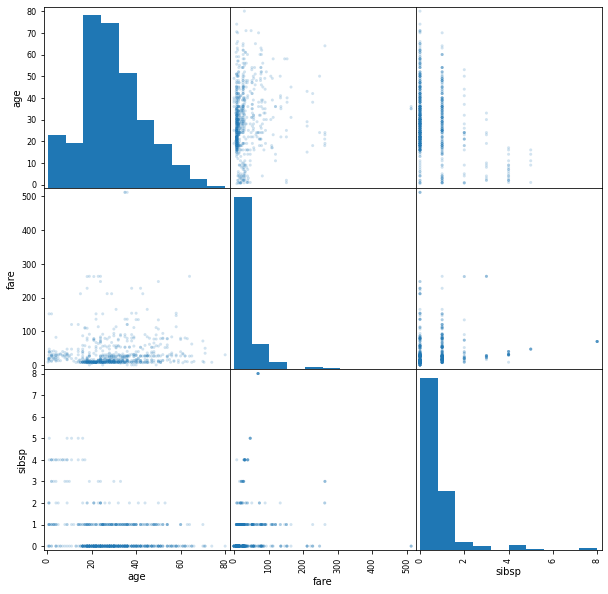

In [29]:
## create a scatter plot matrix to visualize the relationships between multiple numeric columns
from pandas.plotting import scatter_matrix
scatter_matrix(df[['age', 'fare', 'sibsp']], alpha=0.2, figsize=(10, 10))
plt.show()

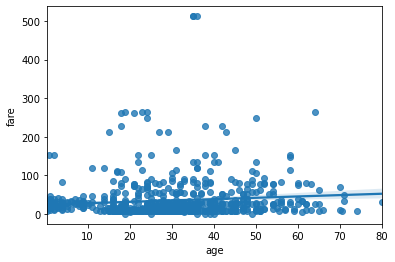

In [30]:
## create a regression plot to visualize the relationship between two numeric columns
sns.regplot(x='age', y='fare', data=df)
plt.show()

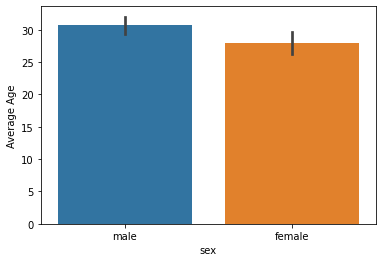

In [31]:
## create a barplot to visualize the mean of a numeric column by the categories of a categorical column
sns.barplot(x='sex', y='age', data=df)
plt.ylabel('Average Age')
plt.show()

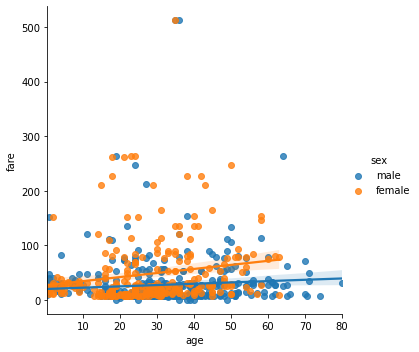

In [32]:
## create a lmplot to visualize the relationship between two numeric columns and the categories of a categorical column
sns.lmplot(x='age', y='fare', hue='sex', data=df)
plt.show()

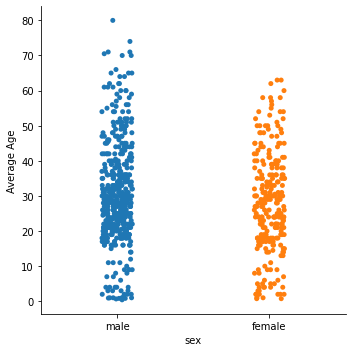

In [33]:
## create a categoryplot to visualize the distribution of a numeric column by the categories of a categorical column
sns.catplot(x='sex', y='age', data=df)
plt.ylabel('Average Age')
plt.show()

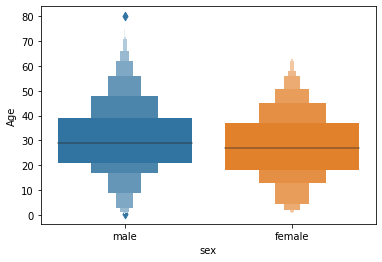

In [34]:
## create a boxenplot to visualize the distribution of a numeric column by the categories of a categorical column
sns.boxenplot(x='sex', y='age', data=df)
plt.ylabel('Age')
plt.show()

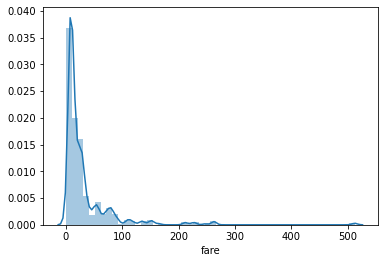

In [35]:
## create a distplot to visualize the distribution of a numeric column
sns.distplot(df['fare'])
plt.show()

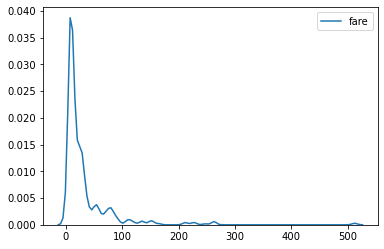

In [36]:
## create a kdeplot to visualize the kernel density estimate of a numeric column
sns.kdeplot(df['fare'])
plt.show()

In [37]:
## Data Preprocessing

In [38]:
# create a copy of the original DataFrame
df_preprocessed = df.copy()

In [39]:
# Handle missing values in the DataFrame

# This technique is used when there are missing values in the dataset. 
# There are various ways to handle missing values, such as filling them with the mean, 
# median, or mode of the column, or dropping rows with missing values. The appropriate 
# method will depend on the specific dataset and the goal of the analysis.

# Impute missing values with 'median'
df_preprocessed['age'].fillna(df_preprocessed['age'].median(), inplace=True)


In [40]:
print(df_preprocessed.isnull().sum())

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64


In [41]:
df_preprocessed.dropna(inplace=True)
print(df_preprocessed.isnull().sum())

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64


In [42]:
#VARIOUS DATA STATISTICS (after Missing Value corrections)

In [43]:
df_no_missing_value = df_preprocessed
print(df_no_missing_value.head())

    survived  pclass     sex   age  sibsp  parch    ticket     fare cabin  \
1          1       1  female  38.0      1      0  PC 17599  71.2833   C85   
3          1       1  female  35.0      1      0    113803  53.1000  C123   
6          0       1    male  54.0      0      0     17463  51.8625   E46   
10         1       3  female   4.0      1      1   PP 9549  16.7000    G6   
11         1       1  female  58.0      0      0    113783  26.5500  C103   

   embarked  
1         C  
3         S  
6         S  
10        S  
11        S  


In [44]:
# calculate summary statistics for a numeric column
print(df_no_missing_value['age'].describe())

count    202.000000
mean      34.952574
std       15.054584
min        0.920000
25%       25.000000
50%       33.500000
75%       46.750000
max       80.000000
Name: age, dtype: float64


In [45]:
# calculate the skewness and kurtosis of a numeric column
print(df_no_missing_value['age'].skew())
print(df_no_missing_value['age'].kurtosis())

0.14257026013022087
-0.052877920567336645


In [46]:
# calculate the correlation between two numeric columns
print(df_no_missing_value['age'].corr(df_no_missing_value['fare']))

-0.07279824135547017


In [47]:
# perform a t-test to compare the means of two numeric columns
from scipy.stats import ttest_ind

t, p = ttest_ind(df_no_missing_value['age'], df_no_missing_value['fare'])
print(t, p)

-7.669244757950662 1.317217792310494e-13


In [48]:
# perform an ANOVA test to compare the means of two or more numeric columns
from scipy.stats import f_oneway

f, p = f_oneway(df_no_missing_value['age'], df_no_missing_value['fare'])
print(f, p)

58.81731515735372 1.3172177923106418e-13


In [49]:
#DROP COLUMNS THAT DOES NOT HAVE PREDICTIVE VALUES - Use Business Understanding

In [50]:
#Drop Ticket Number and Cabin Number columns
df_select_columns = df_no_missing_value.drop(columns = ['ticket','cabin'])
print(df_select_columns.head())

    survived  pclass     sex   age  sibsp  parch     fare embarked
1          1       1  female  38.0      1      0  71.2833        C
3          1       1  female  35.0      1      0  53.1000        S
6          0       1    male  54.0      0      0  51.8625        S
10         1       3  female   4.0      1      1  16.7000        S
11         1       1  female  58.0      0      0  26.5500        S


In [51]:
# ENCODE CATEGORICAL VARIABLES TO NUMERICAL DUMMY COLUMNS -- mandatory before using ScikitLearn

In [52]:
# Encode categorical variables using one-hot encoding. All Columns must have numerical values after this step
df_no_missing_value = df_preprocessed.copy()
df_preprocessed_again = pd.get_dummies(df_select_columns, columns=['sex', 'pclass', 'embarked'], prefix=['sex', 'pclass', 'embarked'])

In [53]:
print(df_preprocessed_again.head())

    survived   age  sibsp  parch     fare  sex_female  sex_male  pclass_1  \
1          1  38.0      1      0  71.2833           1         0         1   
3          1  35.0      1      0  53.1000           1         0         1   
6          0  54.0      0      0  51.8625           0         1         1   
10         1   4.0      1      1  16.7000           1         0         0   
11         1  58.0      0      0  26.5500           1         0         1   

    pclass_2  pclass_3  embarked_C  embarked_Q  embarked_S  
1          0         0           1           0           0  
3          0         0           0           0           1  
6          0         0           0           0           1  
10         0         1           0           0           1  
11         0         0           0           0           1  


In [54]:
# EXAMPLE OF VARIOUS PRE-PROCESSING (Binning, Scaling etc.) ON ACTUAL NUMBER COLUMNS (Age, Fare)

In [55]:
# standardize the values of a numeric column
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_preprocessed_again['Age_scaled'] = scaler.fit_transform(df_preprocessed_again[['age']])


In [56]:
print(df_preprocessed_again['Age_scaled'].head())

1     0.202928
3     0.003158
6     1.268368
10   -2.061131
11    1.534728
Name: Age_scaled, dtype: float64


In [57]:
# bin the values of a numeric column
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal')
df_preprocessed_again['Age_binned'] = discretizer.fit_transform(df_preprocessed_again[['age']])

In [58]:
print(df_preprocessed_again.head())

    survived   age  sibsp  parch     fare  sex_female  sex_male  pclass_1  \
1          1  38.0      1      0  71.2833           1         0         1   
3          1  35.0      1      0  53.1000           1         0         1   
6          0  54.0      0      0  51.8625           0         1         1   
10         1   4.0      1      1  16.7000           1         0         0   
11         1  58.0      0      0  26.5500           1         0         1   

    pclass_2  pclass_3  embarked_C  embarked_Q  embarked_S  Age_scaled  \
1          0         0           1           0           0    0.202928   
3          0         0           0           0           1    0.003158   
6          0         0           0           0           1    1.268368   
10         0         1           0           0           1   -2.061131   
11         0         0           0           0           1    1.534728   

    Age_binned  
1          5.0  
3          4.0  
6          7.0  
10         0.0  
11     

In [59]:
# apply a min-max scaling to a numeric column
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_preprocessed_again['Age_scaled_minmax'] = scaler.fit_transform(df_preprocessed_again[['age']])

In [60]:
print(df_preprocessed_again.head())

    survived   age  sibsp  parch     fare  sex_female  sex_male  pclass_1  \
1          1  38.0      1      0  71.2833           1         0         1   
3          1  35.0      1      0  53.1000           1         0         1   
6          0  54.0      0      0  51.8625           0         1         1   
10         1   4.0      1      1  16.7000           1         0         0   
11         1  58.0      0      0  26.5500           1         0         1   

    pclass_2  pclass_3  embarked_C  embarked_Q  embarked_S  Age_scaled  \
1          0         0           1           0           0    0.202928   
3          0         0           0           0           1    0.003158   
6          0         0           0           0           1    1.268368   
10         0         1           0           0           1   -2.061131   
11         0         0           0           0           1    1.534728   

    Age_binned  Age_scaled_minmax  
1          5.0           0.468892  
3          4.0      

In [61]:
# apply a robust scaling to a numeric column
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_preprocessed_again['Age_scaled_robust'] = scaler.fit_transform(df_preprocessed_again[['age']])


In [62]:
print(df_preprocessed_again.head())

    survived   age  sibsp  parch     fare  sex_female  sex_male  pclass_1  \
1          1  38.0      1      0  71.2833           1         0         1   
3          1  35.0      1      0  53.1000           1         0         1   
6          0  54.0      0      0  51.8625           0         1         1   
10         1   4.0      1      1  16.7000           1         0         0   
11         1  58.0      0      0  26.5500           1         0         1   

    pclass_2  pclass_3  embarked_C  embarked_Q  embarked_S  Age_scaled  \
1          0         0           1           0           0    0.202928   
3          0         0           0           0           1    0.003158   
6          0         0           0           0           1    1.268368   
10         0         1           0           0           1   -2.061131   
11         0         0           0           0           1    1.534728   

    Age_binned  Age_scaled_minmax  Age_scaled_robust  
1          5.0           0.468892    

In [63]:
# apply a power transformation to a numeric column
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')
df_preprocessed_again['Age_PowerTransformed'] = transformer.fit_transform(df_preprocessed_again[['age']])

In [64]:
print(df_preprocessed_again.head())

    survived   age  sibsp  parch     fare  sex_female  sex_male  pclass_1  \
1          1  38.0      1      0  71.2833           1         0         1   
3          1  35.0      1      0  53.1000           1         0         1   
6          0  54.0      0      0  51.8625           0         1         1   
10         1   4.0      1      1  16.7000           1         0         0   
11         1  58.0      0      0  26.5500           1         0         1   

    pclass_2  pclass_3  embarked_C  embarked_Q  embarked_S  Age_scaled  \
1          0         0           1           0           0    0.202928   
3          0         0           0           0           1    0.003158   
6          0         0           0           0           1    1.268368   
10         0         1           0           0           1   -2.061131   
11         0         0           0           0           1    1.534728   

    Age_binned  Age_scaled_minmax  Age_scaled_robust  Age_PowerTransformed  
1          5.0 

In [65]:
# apply a box-cox transformation to a numeric column
from scipy.stats import boxcox

df_preprocessed_again['Age_transformed_boxcox'], lambda_ = boxcox(df_preprocessed_again['age'])

In [66]:
print(df_preprocessed_again.head())

    survived   age  sibsp  parch     fare  sex_female  sex_male  pclass_1  \
1          1  38.0      1      0  71.2833           1         0         1   
3          1  35.0      1      0  53.1000           1         0         1   
6          0  54.0      0      0  51.8625           0         1         1   
10         1   4.0      1      1  16.7000           1         0         0   
11         1  58.0      0      0  26.5500           1         0         1   

    pclass_2  pclass_3  embarked_C  embarked_Q  embarked_S  Age_scaled  \
1          0         0           1           0           0    0.202928   
3          0         0           0           0           1    0.003158   
6          0         0           0           0           1    1.268368   
10         0         1           0           0           1   -2.061131   
11         0         0           0           0           1    1.534728   

    Age_binned  Age_scaled_minmax  Age_scaled_robust  Age_PowerTransformed  \
1          5.0

In [67]:
# Let's bin the Fare column now
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal')
df_preprocessed_again['Fare_binned'] = discretizer.fit_transform(df_preprocessed_again[['fare']])

In [68]:
print(df_preprocessed_again.head())

    survived   age  sibsp  parch     fare  sex_female  sex_male  pclass_1  \
1          1  38.0      1      0  71.2833           1         0         1   
3          1  35.0      1      0  53.1000           1         0         1   
6          0  54.0      0      0  51.8625           0         1         1   
10         1   4.0      1      1  16.7000           1         0         0   
11         1  58.0      0      0  26.5500           1         0         1   

    pclass_2  pclass_3  embarked_C  embarked_Q  embarked_S  Age_scaled  \
1          0         0           1           0           0    0.202928   
3          0         0           0           0           1    0.003158   
6          0         0           0           0           1    1.268368   
10         0         1           0           0           1   -2.061131   
11         0         0           0           0           1    1.534728   

    Age_binned  Age_scaled_minmax  Age_scaled_robust  Age_PowerTransformed  \
1          5.0

In [69]:
# KEEP ONLY REQUIRED COLUMNS - Let's just use the Binned Values for AGE and FARE and DROP other processed columns

In [70]:
#df_preprocessed_again = df_preprocessed_again.drop(columns=['age','fare'])
df_preprocessed_again = df_preprocessed_again.drop(columns=['age','fare','Age_scaled','Age_scaled_minmax','Age_scaled_robust','Age_PowerTransformed','Age_transformed_boxcox'])
print(df_preprocessed_again.head())


    survived  sibsp  parch  sex_female  sex_male  pclass_1  pclass_2  \
1          1      1      0           1         0         1         0   
3          1      1      0           1         0         1         0   
6          0      0      0           0         1         1         0   
10         1      1      1           1         0         0         0   
11         1      0      0           1         0         1         0   

    pclass_3  embarked_C  embarked_Q  embarked_S  Age_binned  Fare_binned  
1          0           1           0           0         5.0          5.0  
3          0           0           0           1         4.0          4.0  
6          0           0           0           1         7.0          4.0  
10         1           0           0           1         0.0          1.0  
11         0           0           0           1         7.0          2.0  


In [71]:
# PREPARE FOR MACHINE LEARNING (ScikitLearn)

In [72]:
# Define the y (dependent variable) and X (independent variables)

X = df_preprocessed_again.drop(['survived'], axis = 1)
print(X.head())          

    sibsp  parch  sex_female  sex_male  pclass_1  pclass_2  pclass_3  \
1       1      0           1         0         1         0         0   
3       1      0           1         0         1         0         0   
6       0      0           0         1         1         0         0   
10      1      1           1         0         0         0         1   
11      0      0           1         0         1         0         0   

    embarked_C  embarked_Q  embarked_S  Age_binned  Fare_binned  
1            1           0           0         5.0          5.0  
3            0           0           1         4.0          4.0  
6            0           0           1         7.0          4.0  
10           0           0           1         0.0          1.0  
11           0           0           1         7.0          2.0  


In [73]:
y = df_preprocessed_again['survived']
print(y.head())

1     1
3     1
6     0
10    1
11    1
Name: survived, dtype: int64


In [74]:
# using the train test split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)

In [75]:
# printing out train and test sets
  
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
     sibsp  parch  sex_female  sex_male  pclass_1  pclass_2  pclass_3  \
209      0      0           0         1         1         0         0   
765      1      0           1         0         1         0         0   
299      0      1           1         0         1         0         0   
230      1      0           1         0         1         0         0   
662      0      0           0         1         1         0         0   

     embarked_C  embarked_Q  embarked_S  Age_binned  Fare_binned  
209           1           0           0         5.0          3.0  
765           0           0           1         6.0          6.0  
299           1           0           0         6.0          9.0  
230           0           0           1         4.0          7.0  
662           0           0           1         6.0          1.0  

X_test : 
     sibsp  parch  sex_female  sex_male  pclass_1  pclass_2  pclass_3  \
621      1      0           0         1         1         0     

In [76]:
# NOW SELECT ML ALGORITHM

In [77]:
#importing the Naive Bayes algorithm module Gaussian which is used in classification; it assumes that features follow normal distribution
from sklearn.naive_bayes import GaussianNB 

# using Gaussian Naive Bayes Algorithm
model = GaussianNB()

In [78]:
# TRAIN THE MODEL USING TRAINING DATASET "Features (X_train)" and "Outcome (y_train)"

In [79]:
# Training Naive bayes classifier
print ("Training Model using Gaussian Naive Bayes algorithm .....")
t = model.fit(X_train, y_train)
print ("Training completed")

Training Model using Gaussian Naive Bayes algorithm .....
Training completed


In [80]:
# TEST THE TRAINED MODEL BY USING THE MODEL TO PREDICT FROM THE TEST DATA "Features (X_test)"

In [81]:
#Test the unseen passangers from test dataset
print ("testing trained model to predict Test Data labels")
y_predicted = model.predict(X_test)
print ("Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Labels with the Test Labels:")

testing trained model to predict Test Data labels
Completed classification of the Test Data .... now printing Accuracy Score by comparing the Predicted Labels with the Test Labels:


In [82]:
# CALCULATE THE PERFORMANCE BY COMPARING "Predicted Y" against "y_TEST"

In [83]:
#print accuracy of the model
#In multilabel classification, this function computes subset accuracy

from sklearn.metrics import accuracy_score

# Accuracy score is just percentage of correct predictions
print (accuracy_score(y_test, y_predicted))

0.6666666666666666


In [84]:
# CALCULATE CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

In [85]:
df_table = confusion_matrix(y_test, y_predicted)
print (df_table)


[[15  9]
 [ 8 19]]


In [86]:
# MANUALLY CALCULATE ACCURACY, PRECISION,, RECALL, and F1-Score

In [87]:
print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

accuracy: 0.6666666666666666
precision: 0.6785714285714286
recall: 0.7037037037037037
f1 score:  0.6909090909090909


In [88]:
# ANOTHER WAY OF CALCULATING PERFORMANCE MATRIX

In [89]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support

accuracy_score(y_test,y_predicted) # accuracy score

# Printing classifier report after prediction
print(classification_report(y_test,y_predicted))


              precision    recall  f1-score   support

           0       0.65      0.62      0.64        24
           1       0.68      0.70      0.69        27

    accuracy                           0.67        51
   macro avg       0.67      0.66      0.66        51
weighted avg       0.67      0.67      0.67        51



In [90]:
# CALCULATE and PRINT AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

0.6643518518518519


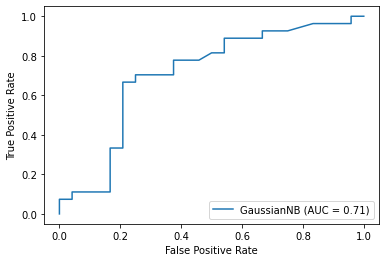

In [91]:
#print roc score 
test_auc = roc_auc_score(y_test, y_predicted)
#ROC AUC Curve
plot_roc_curve(t, X_test, y_test)

print(test_auc)

In [ ]:
# ALGORITHM: DECISION TREE

In [92]:
# Fit a decision tree
from sklearn.tree import DecisionTreeClassifier
t = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=101,max_features=None)
t = t.fit(X_train, y_train)
y_pred=t.predict(X_test)

In [93]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# check for the sklearn version
import sklearn
print(sklearn.__version__)

0.23.1


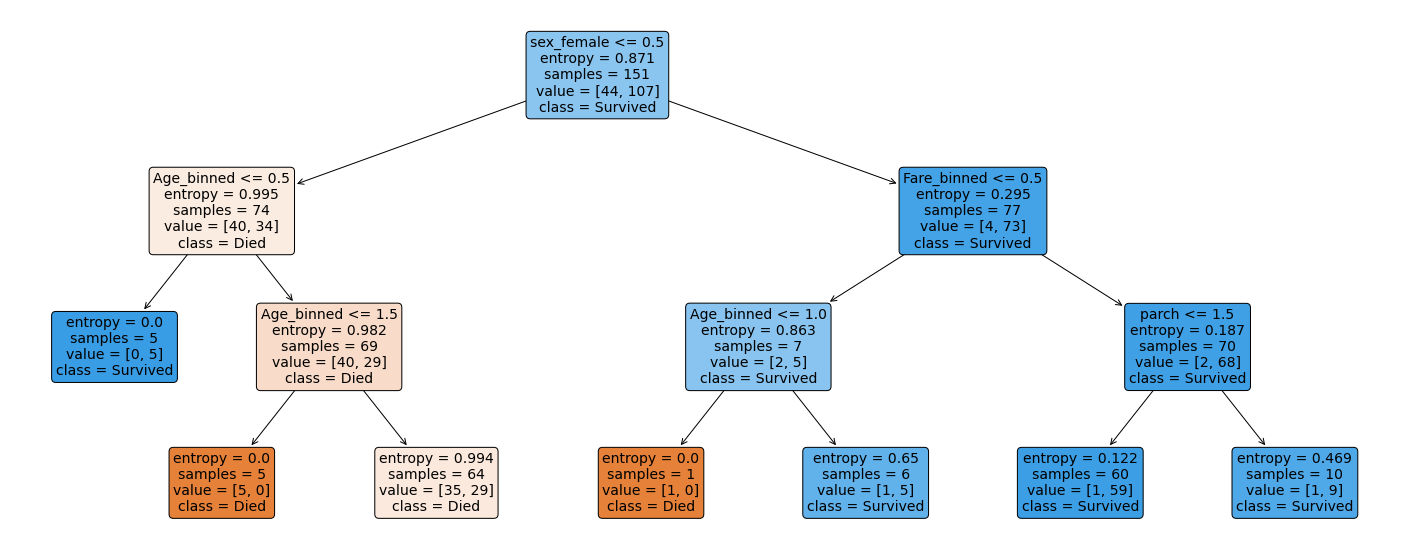

In [94]:
plt.figure(figsize=(25,10))
a = plot_tree(t, feature_names=list(X_train), class_names=['Died', 'Survived'], 
              filled=True, rounded=True, fontsize=14)

In [ ]:
ALGORITHM: RANDOM FOREST CLASSIFIER

In [95]:
from sklearn.ensemble import RandomForestClassifier

t = RandomForestClassifier(n_estimators=100,max_features='auto',random_state=101)
t.fit(X_train,y_train)
y_predicted=t.predict(X_test)

In [98]:
# Check Performance

# Printing classifier report after prediction
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.71      0.62      0.67        24
           1       0.70      0.78      0.74        27

    accuracy                           0.71        51
   macro avg       0.71      0.70      0.70        51
weighted avg       0.71      0.71      0.70        51



In [ ]:
ALGORITHM: ADABOOST CLASSIFIER

In [99]:
from sklearn.ensemble import AdaBoostClassifier

t = AdaBoostClassifier(n_estimators=100)
t.fit(X_train,y_train)
y_predicted=t.predict(X_test)


In [100]:
# Check Performance

# Printing classifier report after prediction
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.72      0.54      0.62        24
           1       0.67      0.81      0.73        27

    accuracy                           0.69        51
   macro avg       0.69      0.68      0.68        51
weighted avg       0.69      0.69      0.68        51



In [ ]:
ALGORITHM GRADIENT BOOSTING CLASSIFIER

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

t = GradientBoostingClassifier(n_estimators=100)
t.fit(X_train,y_train)
y_predicted=t.predict(X_test)


In [103]:
# Check Performance

# Printing classifier report after prediction
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.72      0.54      0.62        24
           1       0.67      0.81      0.73        27

    accuracy                           0.69        51
   macro avg       0.69      0.68      0.68        51
weighted avg       0.69      0.69      0.68        51

